In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


## Proposed TA2 evaluation


Performer teams submit soft labels for their predictions:

In [2]:
y_predicted = np.array([0.1, 0.4, 0.35, 0.8, 0.82, 0.01, 0.3, 0.5, 0.91, 0.28, 0.2, 0.43, 0.72])

Evaluation Team knows the true values:

In [3]:
y_true = np.array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

Now we create a receiver operating characteristic (ROC) curve:

In [4]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(y_true, y_predicted, pos_label=1)

The metric we will use to evaluate teams is area under the curve (AUC) created by the false positive rate and the true positive rate. This is the same metric PAN 2020 used.

In [5]:
metrics.auc(false_pos_rate, true_pos_rate)

0.6904761904761906

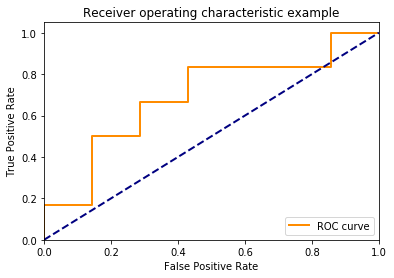

In [6]:
plt.figure()
lw = 2
plt.plot(
    false_pos_rate,
    true_pos_rate,
    color="darkorange",
    lw=lw,
    label="ROC curve"
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
precision = true_pos_rate
recall = 1 - false_pos_rate

We can also create a ROC curve. This shows us the false positive rate and true positive rate as we vary the threshold on the prediction model. The blue line is a random baseline, and the orange line (the ROC curve) should always be above the blue line. 

Now, given any metric (F-score, for example), we can select the optimal threshold that maximizes that value. F-score is defined as: 

2 * (precision * recall) / (precision + recall)

In [7]:
fscore = 2 * (precision * recall) / (precision + recall)
max(fscore)

0.689655172413793

And we can find the threshold that corresponds to that max score:

In [8]:
thresholds[list(fscore).index(max(fscore))]

0.43